In [1]:
%matplotlib inline

## Erros numéricos e seus efeitos

### Polinômios

**Exemplo**: Avaliar o polinômio $P(x) = x^3 - 6x^2 + 4x - 0.1$
no ponto $x=5.24$ e comparar com o resultado exato.

Vamos fazer o seguinte:

1. Com uma calculadora, computar o valor de $P(5.24)$ e assuma que este é seu valor exato.

2. Calcular $P(5.24)$ usando arredondamento com dois dígitos de precisão.

**Passo 1**

Faça as suas contas! Suponhamos que seja -0.007776.

**Passo 2**

Vamos "imitar" as contas feitas na mão... 

In [2]:
# parcelas 

p1 = 5.24**3
print('p1: {0:.20g}'.format(p1)) # 20 dígitos significativos
print('p1 (com arredondamento): {0:.2f}'.format(p1)) # precisão 1

print('\n')

p2 = - 6*5.24**2
print('p2: {0:.20g}'.format(p2))
print('p2 (com arredondamento): {0:.2f}'.format(p2))

print('\n')

p3 = 4*5.24
print('p3: {0:.20g}'.format(p3))
print('p3 (com arredondamento): {0:.2f}'.format(p3))

print('\n')

p4 = - 0.1
print('p4: {0:.20g}'.format(p4))
print('p4 (com arredondamento): {0:.2f}'.format(p4))

print('\n')

Px = p1 + p2 + p3 + p4
print('Px: {0:.20g}'.format(Px))
print('Px: (com arredondamento): {0:.2f}'.format(Px))

p1: 143.87782400000000393
p1 (com arredondamento): 143.88


p2: -164.74560000000002447
p2 (com arredondamento): -164.75


p3: 20.960000000000000853
p3 (com arredondamento): 20.96


p4: -0.10000000000000000555
p4 (com arredondamento): -0.10


Px: -0.0077760000000196838332
Px: (com arredondamento): -0.01


**Conclusão:** o cálculo com dois dígitos afeta o resultado drasticamente!

Agora, vamos comparar o resultado de se avaliar $P(5.24)$ com as duas formas do polinômio e 16 dígitos de precisão:

In [3]:
# ponto de análise
x = 5.24

# P1(x) 
P1x = x**3 - 6*x**2 + 4*x - 0.1
print('{0:.16f}'.format(P1x))

# P2(x) 
P2x = x*(x*(x - 6) + 4) - 0.1
print('{0:.16f}'.format(P2x))


-0.0077760000000197
-0.0077759999999939


O que temos acima? Dois valores levemente distintos. Se computarmos os erros absoluto e relativo entre esses valores e nosso valor supostamente assumido como exato, teríamos: 

**Erros absolutos**

In [4]:
x_exato = -0.007776
EA1 = abs(P1x - x_exato)
print(EA1)

EA2 = abs(P2x - x_exato)
print(EA2)

1.968390728190883e-14
6.1287780406260595e-15


Claro que $EA2 > EA1$. Entretanto, podemos verificar pelo seguinte teste lógico:

In [5]:
# teste é verdadeiro
EA1 > EA2

True

**Erros relativos**

Os erros relativos também podem ser computados como:

In [6]:
ER1 = EA1/abs(x_exato)
print(ER1)

ER2 = EA2/abs(x_exato)
print(ER2)

2.5313666772002096e-12
7.881659002862731e-13


**Gráfico de $P(x)$**

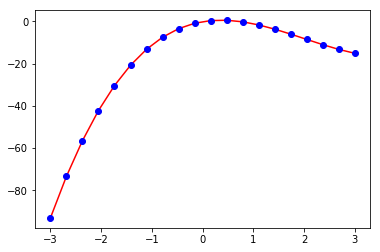

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# eixo x com 20 pontos
x = np.linspace(-3,3,num=20,endpoint=True)

# plotagem de P1(x) e P2(x)
P1x = lambda x: x**3 - 6*x**2 + 4*x - 0.1
P2x = lambda x: x*(x*(x - 6) + 4) - 0.1
plt.plot(x,P1x(x),'r',x,P2x(x),'bo')

### Função de Airy

A função de Airy é solução da equação de Schrödinger da mecânica quântica. Muda o comportamento de oscilatório para exponencial.

Abaixo, vamos criar uma função aproximada (perturbada) para a função de Airy (assumindo-a como uma aproximação daquela que é exata) e outra para calcular diretamente o erro relativo para valores dessas funções.


In [8]:
from scipy import special
import matplotlib.pyplot as plt 

# eixo x 
x = np.linspace(-10, -2, 100)

# funções de Airy e derivadas (solução exata)
ai, aip, bi, bip = special.airy(x)

# função de Airy (fazendo papel de solução aproximada)
ai2 = 1.1*ai + 0.05*np.cos(x) 

Podemos usar o conceito de _função anônima_ para calcular diretamente o **erro relativo percentual** para cada ponto $x$:

$$ER_p(x) = \frac{\mid \ f_{aprox}(x) - f_{ex}(x) \ \mid}{\mid \ f_{ex}(x) \ \mid},$$

onde $f_{aprox}(x)$ é o valor da função aproximada (de Airy) e 
onde $f_{ex}(x)$ é o valor da função exata (de Airy).

In [9]:
# define função anônima para erro relativo
r = lambda fex,faprox: (np.abs(fex-faprox)/np.abs(fex))/100

# calcula erro relativo para função de Airy e sua aproximação
rel = r(ai,ai2)

A seguir, mostramos a plotagem das funções exatas e aproximadas, bem como do erro relativo pontual.

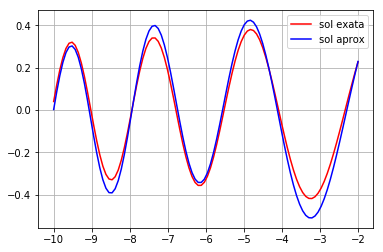

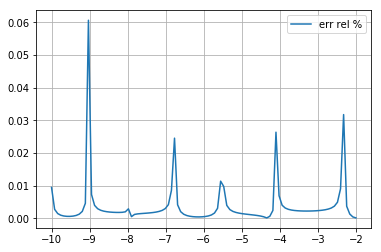

In [10]:
# plotagens 
plt.plot(x, ai, 'r', label='sol exata')
plt.plot(x, ai2, 'b', label='sol aprox')
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.plot(x,rel,'-', label='err rel %')
plt.grid()
plt.legend(loc='upper right')

### Erro de cancelamento

Ocorre quando números de grandezas próximas são subtraídos. No exemplo, a seguir, induzimos uma divisão por zero usando o valor do épsilon de máquina $\epsilon_m$ ao fazer 

$$\dfrac{1}{(1 + 0.25\epsilon_m) - 1}$$

Isto ocorre porque o denominador sofre um _cancelamento subtrativo_, quando, para a matemática precisa, deveria valer $0.25\epsilon_m$.

In [11]:
# valor do epsilon de máquina 
em = np.finfo(float).eps

1/((1 + 0.25*em) - 1)

/Users/gustavo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


inf

### Propagação de erros

Vamos comparar duas situações. Calcular 

$$e^{-v} = \sum_{i=0}^{\infty} (-1)^i \frac{v^i}{i!}$$

e comparar com a identidade $$e^{-v} = \dfrac{1}{e^v}.$$

In [45]:
# somatória (primeiros 20 termos)
v = 5.25
s = 0
for i in range(20):    
    print('{0:5g}'.format(s))    
    s += ((-1)**i*v**i)/np.math.factorial(i)

print('\ncaso 1: {0:5g}'.format(s))    

print('caso 2: {0:5g}'.format(1/np.exp(v)))

    0
    1
-4.25
9.53125
-14.5859
17.0679
-16.1686
12.9133
-8.89814
5.41562
-2.93407
1.44952
-0.642652
0.272671
-0.0969786
0.0416401
-0.00687642
0.00904307
0.00412676
0.00556069

caso 1: 0.00516447
caso 2: 0.00524752


**Exercício: Cálculo da área superficial da Terra pelo modelo (absurdamente) simplificado $A = 4\pi R^2$**

Para mostrar o efeito do número de dígitos de $\pi$ sobre o cálculo da área superficial da Terra pelo modelo simplificado $A = 4\pi R^2$, podemos usar o seguinte código escrito em Matlab. 

```matlab
R = 6371; # raio aproximado da Terra [km]

% Use o loop abaixo para obter valores de π via MUPAD
% for i from 3 to 40 do
% DIGITS := i: print(float(PI))
% end_for

% crie um vetor com os valores de π
Pis = [ 3.14,...
        3.142,...
        3.1416,...
        3.14159,...
        3.141593,...
        3.1415927,...
        3.14159265,...
        3.141592654,...
        3.1415926536,...
        3.14159265359,...        
        ];

%% loop de cálculo da área 

j = 3; % contador de dígitos
for i = 1:length(Pis)    
    A = 4*Pis(i)*R*R; % calcula    
    fprintf('d = %d -> A = %f | = %e \n',j,A,A); % imprime    
    j = j+1; % atualiza       
end
```

O resultado deste código deverá ser como: 

```matlab
% saída 
d = 3 -> A = 509805890.960000 | = 5.098059e+08 
d = 4 -> A = 510130608.088000 | = 5.101306e+08 
d = 5 -> A = 510065664.662400 | = 5.100657e+08 
d = 6 -> A = 510064041.076760 | = 5.100640e+08 
d = 7 -> A = 510064528.152452 | = 5.100645e+08 
d = 8 -> A = 510064479.444883 | = 5.100645e+08 
d = 9 -> A = 510064471.326955 | = 5.100645e+08 
d = 10 -> A = 510064471.976389 | = 5.100645e+08 
d = 11 -> A = 510064471.911445 | = 5.100645e+08 
d = 12 -> A = 510064471.909822 | = 5.100645e+08 
```

Implemente um código equivalente em Python.